In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf

In [3]:
df = pd.read_csv(os.path.join(
    "models", "lstm_5_classes.csv"
))

In [11]:
classes_dict = {'hello': 0, 'love': 1, 'please': 2, 'thank you': 3, 'what': 4}

In [12]:
x_train, y_train, x_val, y_val, x_test, y_test = [], [], [], [], [], []
for dataset_name, x_dataset, y_dataset in zip(['train', 'val', 'test'], [x_train, x_val, x_test], [y_train, y_val, y_test]):
    for label in os.listdir(os.path.join('splitted', dataset_name)):
        one_video = []
        for counter, image_path in enumerate(os.listdir(os.path.join('splitted', dataset_name, label)), start=1):

            one_video.append(np.load(os.path.join('splitted', dataset_name, label, image_path)))
           
            if counter % 25 == 0:
                x_dataset.append(np.asarray(one_video).reshape(25, -1))
                y_dataset.append(classes_dict[label])
                one_video.clear()
                
x_train, x_val, x_test = np.asarray(x_train), np.asarray(x_val), np.asarray(x_test)
y_train, y_val, y_test = np.asarray(y_train, dtype=np.float32), np.asarray(y_val, dtype=np.float32), np.asarray(y_test, dtype=np.float32)

In [16]:
path_to_model = os.path.join('models', 'lstm_5_classes.ckpt')

In [ ]:
trained_model = tf.keras.models.load_model(path_to_model)

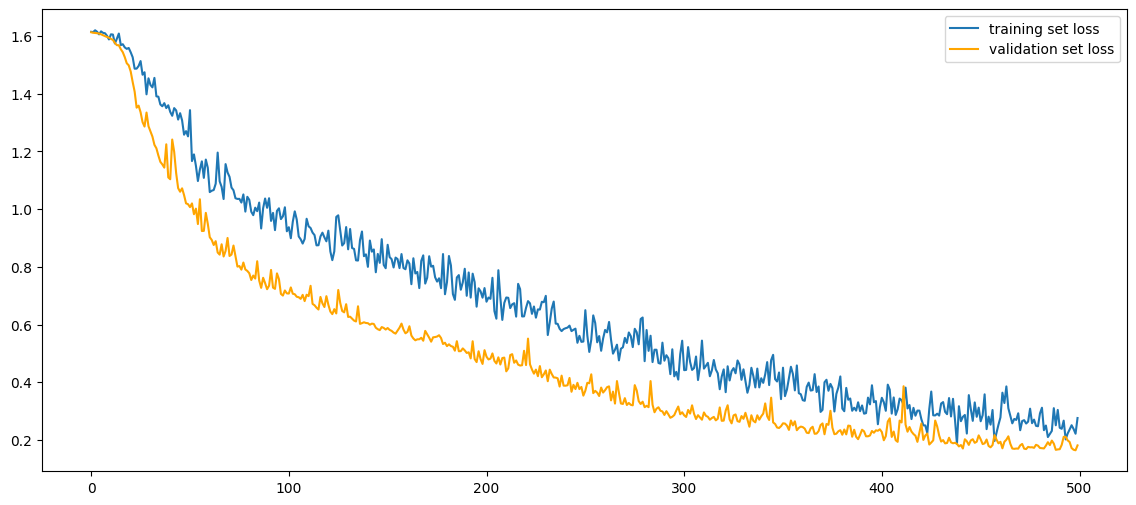

In [33]:
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(df['epoch'], df['loss'], label='training set loss')
ax.plot(df['epoch'], df['val_loss'], color='orange', label='validation set loss')
ax.legend()
plt.show()

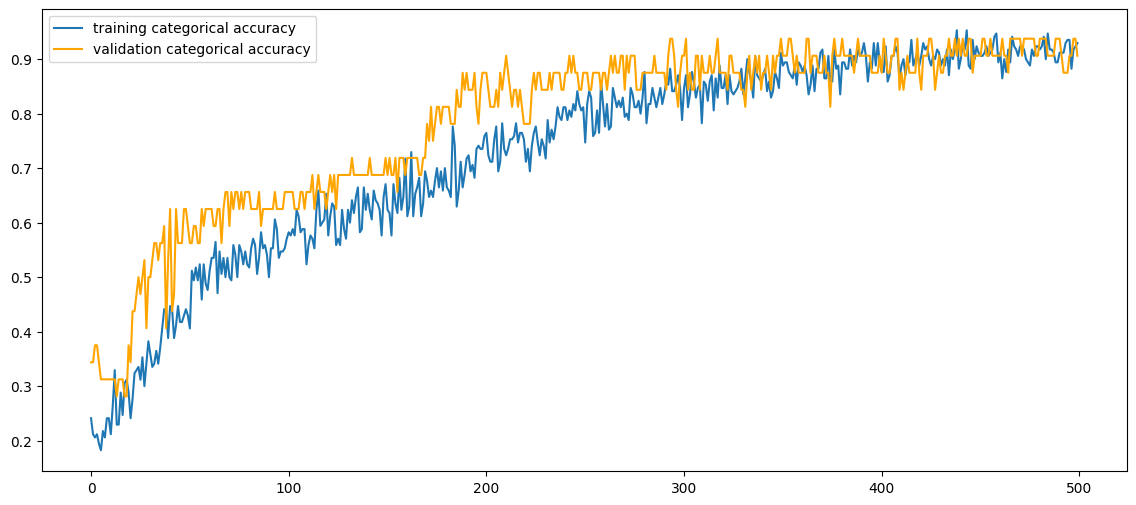

In [34]:
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(df['epoch'], df['categorical_accuracy'], label='training categorical accuracy')
ax.plot(df['epoch'], df['val_categorical_accuracy'], color='orange', label='validation categorical accuracy')
ax.legend()
plt.show()

### **Predictions**

In [18]:
test_preds = trained_model.predict(x_test)
train_preds = trained_model.predict(x_train)
val_preds = trained_model.predict(x_val)

1/1 [==============================] - 0s 65ms/step


In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [24]:
accuracy_score(y_train, np.argmax(train_preds, axis=1))

0.9823529411764705

In [25]:
accuracy_score(y_val, np.argmax(val_preds, axis=1))

0.90625

In [26]:
accuracy_score(y_test, np.argmax(test_preds, axis=1))

0.8787878787878788

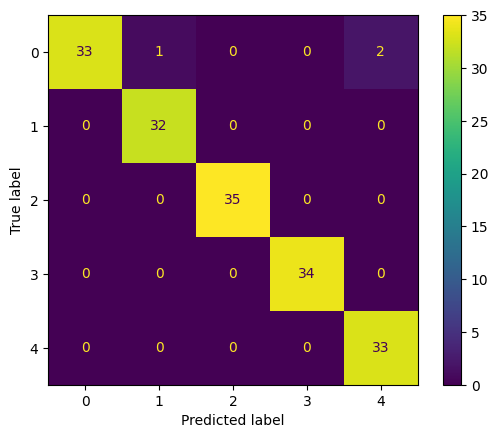

In [35]:
train_cm = ConfusionMatrixDisplay(confusion_matrix(y_train, np.argmax(train_preds, axis=1)))
train_cm.plot()
plt.show()

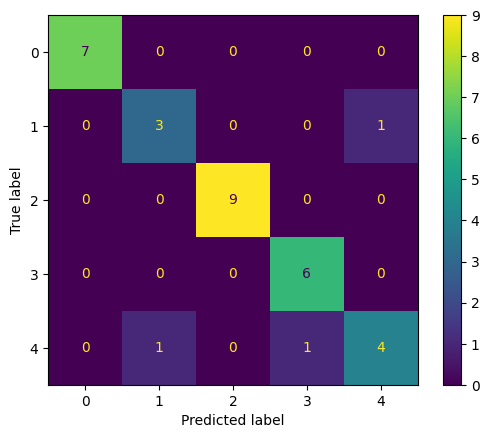

In [29]:
val_cm = ConfusionMatrixDisplay(confusion_matrix(y_val, np.argmax(val_preds, axis=1)))
val_cm.plot()
plt.show()

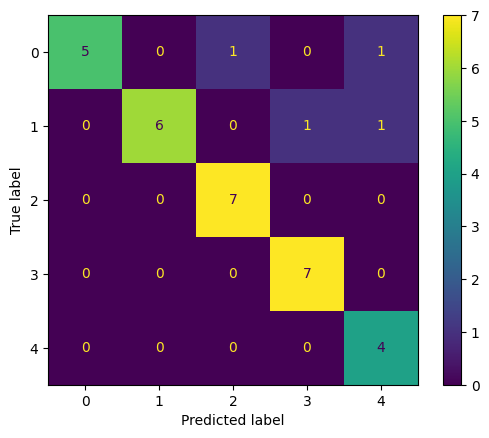

In [30]:
test_cm = ConfusionMatrixDisplay(confusion_matrix(y_test, np.argmax(test_preds, axis=1)))
test_cm.plot()
plt.show()